In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [4]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.build(input_shape=(None,3))
model.weights

2022-02-08 20:27:17.547754: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-08 20:27:17.548103: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


[<tf.Variable 'dense_3/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.27873766, -0.26650834, -0.2640819 ,  0.2422939 , -0.13763326,
          0.01044941,  0.1975815 ,  0.25788355, -0.08311355,  0.18038905,
          0.13504884, -0.17805772,  0.1782594 , -0.27009255, -0.21641573,
         -0.077006  ,  0.03974408,  0.06905445, -0.18146732, -0.1014955 ,
          0.00099531,  0.01691511, -0.08206645, -0.03871226, -0.27798006,
          0.22558963,  0.28579795,  0.03993851,  0.12879059,  0.06752905,
          0.08775854,  0.07350346, -0.04990153,  0.04065371,  0.15471205,
          0.08903411, -0.0521626 , -0.11453524, -0.2389369 , -0.2122444 ,
          0.28264755, -0.15780026,  0.01804984,  0.24735802,  0.14049506,
         -0.20803249,  0.11227959,  0.06004158, -0.19081235,  0.13388881,
          0.07965761,  0.02505529, -0.2580403 , -0.21908364, -0.07704145,
         -0.00445986, -0.17383216, -0.10700744, -0.21249676, -0.00047609,
          0.22978431,  0.2940765 , -0.12394

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  256       
_________________________________________________________________
dense_4 (Dense)              multiple                  650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = keras.Sequential(name='lol')
model.add(layers.Dense(1,activation='relu',name = 'firrrrrstlayer'))
model.build((None,3))
model.summary()

Model: "lol"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
firrrrrstlayer (Dense)       multiple                  4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [10]:
inputs = keras.Input(shape=(3,), name='my_input')
features = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs = inputs, outputs = outputs)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [12]:
inputs.shape

TensorShape([None, 3])

In [13]:
inputs.dtype

tf.float32

In [14]:
features.shape

TensorShape([None, 64])

In [15]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_departments, activation='softmax', name='department')(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [16]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 10000)]      0                                            
__________________________________________________________________________________________________
text_body (InputLayer)          [(None, 10000)]      0                                            
__________________________________________________________________________________________________
tags (InputLayer)               [(None, 100)]        0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 20100)        0           title[0][0]                      
                                                                 text_body[0][0]            

In [17]:
import numpy as np

In [18]:
num_samples = 1280

title_data = np.random.randint(0,2,size=(num_samples,vocabulary_size))
text_body_data = np.random.randint(0,2,size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0,2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples,1))
department_data = np.random.randint(0,2,size=(num_samples,num_departments))

In [19]:
model.compile(optimizer='rmsprop',
              loss=['mean_squared_error','categorical_crossentropy'],
              metrics=[['mean_absolute_error'],['accuracy']])
model.fit([title_data, text_body_data, tags_data], 
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data], 
          [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data,text_body_data,tags_data])

Train on 1280 samples
1280/1280 [==============================] - 3s 3ms/sample - loss: 39.8845 - priority_loss: 0.3171 - department_loss: 39.5674 - priority_mean_absolute_error: 0.4876 - department_accuracy: 0.1742
1280/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

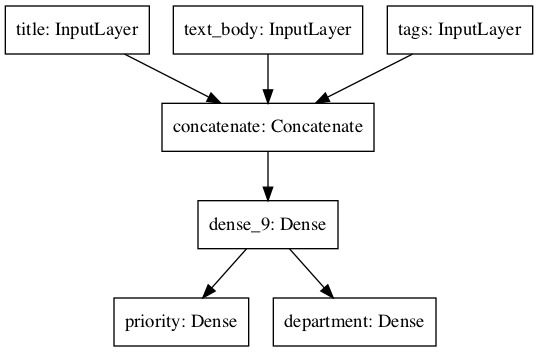

In [20]:
keras.utils.plot_model(model, 'ticket_classifier.png')

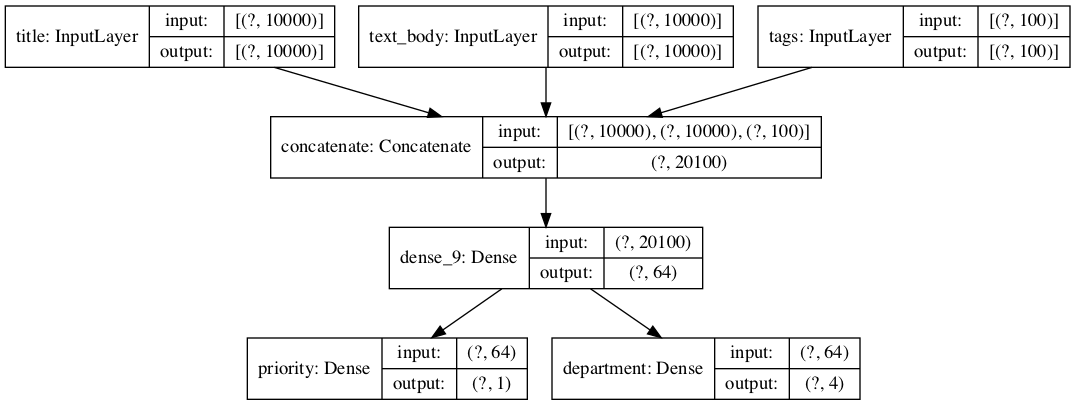

In [24]:
keras.utils.plot_model(model, 'ticket_classifier_with_shape_info.png', show_shapes=True)

In [21]:
model.layers

In [22]:
model.layers[3].input

[<tf.Tensor 'title:0' shape=(None, 10000) dtype=float32>,
 <tf.Tensor 'text_body:0' shape=(None, 10000) dtype=float32>,
 <tf.Tensor 'tags:0' shape=(None, 100) dtype=float32>]

In [23]:
model.layers[3].output

<tf.Tensor 'concatenate/Identity:0' shape=(None, 20100) dtype=float32>

In [25]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)

new_model = keras.Model(
    inputs=[title,text_body,tags],
    outputs = [priority, department, difficulty])

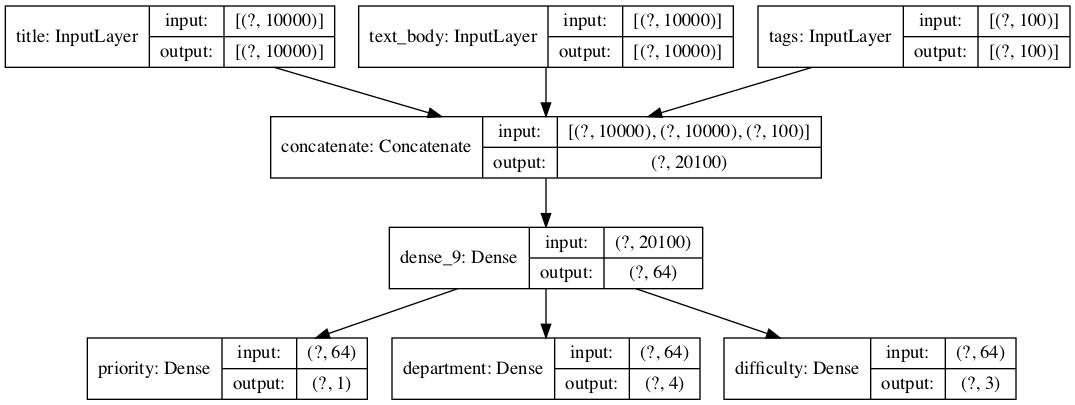

In [26]:
keras.utils.plot_model(new_model, 'updated_ticket_clf.png',show_shapes=True)

In [27]:
class CustomerTicketModel(keras.Model):
    
    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation='relu')
        self.priority_layer = layers.Dense(1, activation='sigmoid')
        self.department_clf = layers.Dense(num_departments, activation='softmax')
        
    def call(self,inputs):
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']
        
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        
        priority = self.priority_layer(features)
        department = self.department_clf(features)
        return priority, department

In [28]:
model = CustomerTicketModel(num_departments=4)

In [29]:
priority, department = model({'title':title_data, 'text_body':text_body_data, 'tags':tags_data})

In [30]:
priority

<tf.Tensor: id=2429, shape=(1280, 1), dtype=float32, numpy=
array([[0.13272431],
       [0.3016114 ],
       [0.4045714 ],
       ...,
       [0.29841247],
       [0.59326893],
       [0.44302332]], dtype=float32)>

In [31]:
department

<tf.Tensor: id=2456, shape=(1280, 4), dtype=float32, numpy=
array([[0.11920497, 0.77077043, 0.09650628, 0.01351837],
       [0.20118284, 0.35754147, 0.3757657 , 0.06550992],
       [0.23667262, 0.35436887, 0.26793763, 0.14102083],
       ...,
       [0.18278955, 0.15089731, 0.5270479 , 0.13926522],
       [0.63395834, 0.19461524, 0.10132018, 0.0701062 ],
       [0.15019043, 0.39215523, 0.33315828, 0.12449608]], dtype=float32)>

In [32]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [35]:
def get_mnist_model():
    inputs = keras.Input(shape=(28*28,))
    features = layers.Dense(512, activation='relu')(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation='softmax')(features)
    model = keras.Model(inputs, outputs)
    return model

In [36]:
(images, labels), (test_images, test_labels) = mnist.load_data()

In [37]:
images = images.reshape((60000, 28*28)).astype('float32')/255
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

In [38]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=3,validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images,test_labels)
predictions = model.predict(test_images)

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 28s 550us/sample - loss: 0.2959 - accuracy: 0.9115 - val_loss: 0.1419 - val_accuracy: 0.9598
Epoch 2/3
50000/50000 [==============================] - 26s 514us/sample - loss: 0.1637 - accuracy: 0.9545 - val_loss: 0.1159 - val_accuracy: 0.9697
Epoch 3/3
50000/50000 [==============================] - 26s 513us/sample - loss: 0.1380 - accuracy: 0.9628 - val_loss: 0.1192 - val_accuracy: 0.9708
10000/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [39]:
predictions[0]

array([1.5099682e-11, 9.1607758e-17, 1.1221741e-10, 1.3900275e-08,
       3.1812048e-16, 8.9726247e-11, 1.7128324e-21, 1.0000000e+00,
       3.1044172e-13, 1.8386723e-08], dtype=float32)

In [40]:
np.argmax(predictions[0])

7

In [41]:
test_labels[0]

7

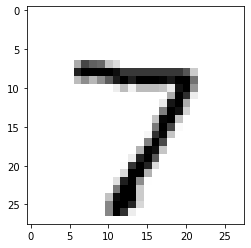

In [46]:
import matplotlib.pyplot as plt
plt.imshow(test_images[0].reshape(28,28), cmap='binary')

In [47]:
import tensorflow as tf

In [51]:
class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name='rmse', **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros')
        self.total_samples = self.add_weight(name='total_samples',initializer='zeros', dtype='int32')
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true-y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
        
    def result(self):
        return tf.sqrt(self.mse_sum/tf.cast(self.total_samples, tf.float32))
    
    def reset_states(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [72]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'RootMeanSquaredError'])
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images,val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 31s 627us/sample - loss: 0.2953 - accuracy: 0.9106 - RootMeanSquaredError: 5.2357 - val_loss: 0.1443 - val_accuracy: 0.9579 - val_RootMeanSquaredError: 5.2179
Epoch 2/3
50000/50000 [==============================] - 31s 617us/sample - loss: 0.1653 - accuracy: 0.9539 - RootMeanSquaredError: 5.2365 - val_loss: 0.1212 - val_accuracy: 0.9670 - val_RootMeanSquaredError: 5.2182
Epoch 3/3
50000/50000 [==============================] - 28s 568us/sample - loss: 0.1429 - accuracy: 0.9618 - RootMeanSquaredError: 5.2367 - val_loss: 0.1171 - val_accuracy: 0.9690 - val_RootMeanSquaredError: 5.2182


In [73]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor = 'val_accuracy',
        patience= 2),
    keras.callbacks.ModelCheckpoint(
        filepath='checkpoint_path.keras',
        monitor = 'val_loss',
        save_best_only=True)]

model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images,val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 27s 546us/sample - loss: 0.2970 - accuracy: 0.9112 - val_loss: 0.1546 - val_accuracy: 0.9568
Epoch 2/10
50000/50000 [==============================] - 29s 589us/sample - loss: 0.1674 - accuracy: 0.9524 - val_loss: 0.1180 - val_accuracy: 0.9668
Epoch 3/10
50000/50000 [==============================] - 29s 577us/sample - loss: 0.1408 - accuracy: 0.9628 - val_loss: 0.1197 - val_accuracy: 0.9699
Epoch 4/10
50000/50000 [==============================] - 30s 594us/sample - loss: 0.1255 - accuracy: 0.9664 - val_loss: 0.1146 - val_accuracy: 0.9739
Epoch 5/10
50000/50000 [==============================] - 28s 567us/sample - loss: 0.1179 - accuracy: 0.9697 - val_loss: 0.1063 - val_accuracy: 0.9752
Epoch 6/10
50000/50000 [==============================] - 27s 549us/sample - loss: 0.1103 - accuracy: 0.9728 - val_loss: 0.1157 - val_accuracy: 0.9755
Epoch 7/10
50000/50000 [====================

In [74]:
from matplotlib import pyplot as plt

In [81]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self,logs):
        self.per_batch_losses = []
        
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get('loss'))
        
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, 
                 label='Training loss for each batch')
        plt.xlabel(f'Batch (epoch {epoch})')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig(f'plot_at_epoch_{epoch}')
        plt.show()
        self.per_batch_losses = []

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
49984/50000 [============================>.] - ETA: 0s - loss: 0.2960 - accuracy: 0.9122

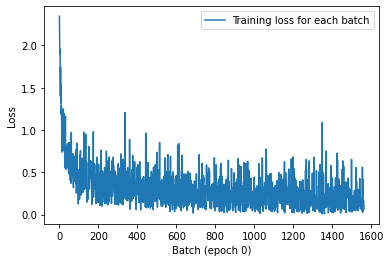

50000/50000 [==============================] - 28s 566us/sample - loss: 0.2960 - accuracy: 0.9122 - val_loss: 0.1681 - val_accuracy: 0.9517
Epoch 2/10
49920/50000 [============================>.] - ETA: 0s - loss: 0.1652 - accuracy: 0.9536

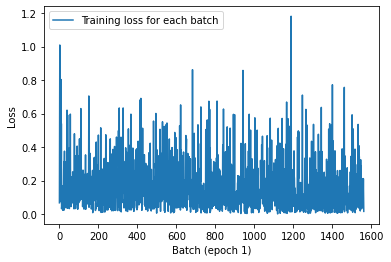

50000/50000 [==============================] - 27s 546us/sample - loss: 0.1651 - accuracy: 0.9536 - val_loss: 0.1221 - val_accuracy: 0.9682
Epoch 3/10
49984/50000 [============================>.] - ETA: 0s - loss: 0.1392 - accuracy: 0.9621

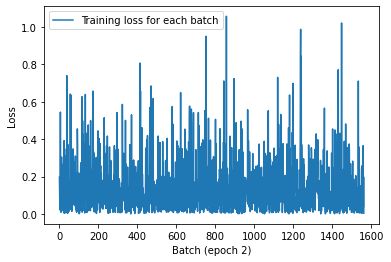

50000/50000 [==============================] - 27s 546us/sample - loss: 0.1392 - accuracy: 0.9621 - val_loss: 0.1178 - val_accuracy: 0.9702
Epoch 4/10
49920/50000 [============================>.] - ETA: 0s - loss: 0.1267 - accuracy: 0.9672

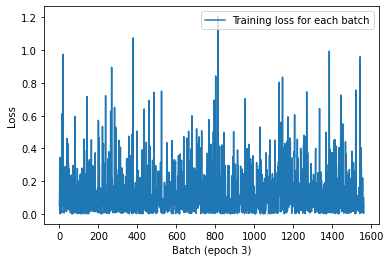

50000/50000 [==============================] - 26s 515us/sample - loss: 0.1266 - accuracy: 0.9672 - val_loss: 0.1109 - val_accuracy: 0.9730
Epoch 5/10
19904/50000 [==========>...................] - ETA: 15s - loss: 0.1160 - accuracy: 0.9698

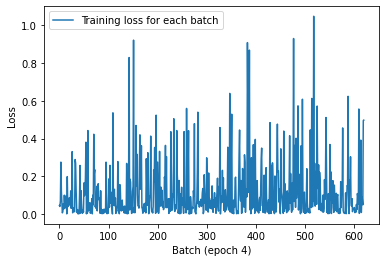

19904/50000 [==========>...................] - ETA: 16s - loss: 0.1160 - accuracy: 0.9698

KeyboardInterrupt: 

In [82]:
model = get_mnist_model()

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images,val_labels))

In [86]:
model = get_mnist_model()

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = keras.callbacks.TensorBoard(
    log_dir='tensorboard')

model.fit(train_images, train_labels, epochs=10,
          callbacks=[tensorboard],
          validation_data=(val_images,val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
  320/50000 [..............................] - ETA: 3:11 - loss: 1.7051 - accuracy: 0.4719

2022-02-08 22:33:51.194619: I tensorflow/core/profiler/lib/profiler_session.cc:184] Profiler session started.


50000/50000 [==============================] - 34s 671us/sample - loss: 0.2941 - accuracy: 0.9132 - val_loss: 0.1500 - val_accuracy: 0.9557
Epoch 2/10
50000/50000 [==============================] - 33s 667us/sample - loss: 0.1621 - accuracy: 0.9555 - val_loss: 0.1289 - val_accuracy: 0.9630
Epoch 3/10
50000/50000 [==============================] - 33s 669us/sample - loss: 0.1366 - accuracy: 0.9633 - val_loss: 0.1136 - val_accuracy: 0.9720
Epoch 4/10
50000/50000 [==============================] - 30s 594us/sample - loss: 0.1282 - accuracy: 0.9664 - val_loss: 0.1062 - val_accuracy: 0.9746
Epoch 5/10
50000/50000 [==============================] - 33s 664us/sample - loss: 0.1155 - accuracy: 0.9711 - val_loss: 0.1077 - val_accuracy: 0.9759
Epoch 6/10
50000/50000 [==============================] - 31s 625us/sample - loss: 0.1094 - accuracy: 0.9735 - val_loss: 0.1122 - val_accuracy: 0.9750
Epoch 7/10
50000/50000 [==============================] - 36s 714us/sample - loss: 0.1054 - accuracy: 0.9

KeyboardInterrupt: 

In [87]:
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
        gradients = tape.gradients(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(model.trainable_weights, gradients))

In [89]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0,1,2]
predictions = [[1,0,0],[0,1,0],[0,0,1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f'result: {current_result:.2f}')

result: 1.00


In [90]:
values = [0,1,2,3,4]
mean_tracker = keras.metrics.Mean()
for value in values: 
    mean_tracker.update_state(value)
print(f'Mean of Values: {mean_tracker.result():.2f}')

Mean of Values: 2.00


In [100]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
    logs['loss'] = loss_tracking_metric.result()
    return logs

In [101]:
def reset_metrics():
    for metric in metrics:
        metric.reset_states()
    loss_tracking_metric.reset_states()

In [102]:
training_dataset = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3

for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f'Results at the end of epoch {epoch}')
    for key, value in logs.items():
        print(f'...{key}: {value:.4f}')

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9124
...loss: 0.2923
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9542
...loss: 0.1657
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9622
...loss: 0.1414


In [107]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)
    
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs['val_' + metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
    logs['val_loss'] = loss_tracking_metric.result()        
    return logs
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print('Evaluation results:')
for key, value in logs.items():
    print(f'...{key}...{value:.4f}')

Evaluation results:
...val_sparse_categorical_accuracy...0.9667
...val_loss...0.1322


In [124]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name='loss')

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))
        self.comiled_metrics.update_state(targets, predictions)
        return {m.name:m.result() for m in self.metrics}
    @property
    def metrics(self):
        return [loss_tracker]

In [126]:
inputs = keras.Input(shape=(28*28,))
features = layers.Dense(512,activation='relu')(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10,activation='softmax')(features)
model = CustomModel(inputs, outputs)
model.compile(optimizer=keras.optimizers.RMSprop(),
             loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics= [keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Train on 50000 samples
Epoch 1/3
50000/50000 [==============================] - 26s 513us/sample - loss: 0.9138
Epoch 2/3
50000/50000 [==============================] - 28s 561us/sample - loss: 0.9340
Epoch 3/3
50000/50000 [==============================] - 25s 494us/sample - loss: 0.9436
